Optimal Control Gain K:
[[4.83342045e+01 4.41567576e+00 2.52334375e-14 2.65030722e-15]
 [5.04994861e-14 2.65030722e-15 4.83342045e+01 4.41567576e+00]]


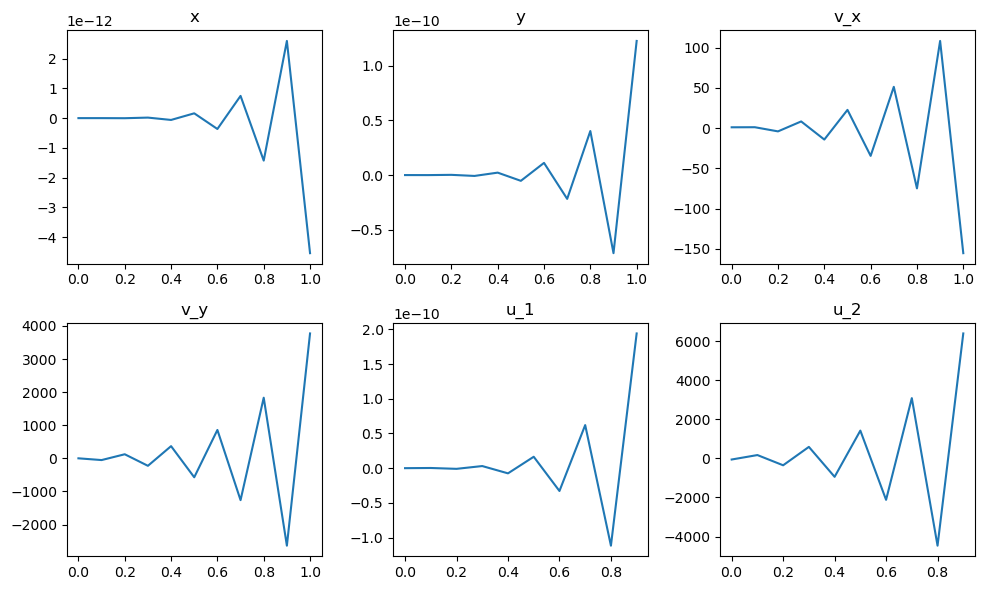

(array([-1.41063743, -1.41063743, -1.00503833, -1.00503833]), matrix([[ 4.02589652e-02, -2.56109273e-02,  4.98038659e-02,
         -1.13588008e-02],
        [-9.70497683e-01,  6.17386598e-01, -9.98586602e-01,
          2.27748310e-01],
        [ 9.85305055e-03,  3.25875328e-02,  9.24383080e-04,
          4.85000741e-02],
        [-2.37521324e-01, -7.85567261e-01, -1.85342351e-02,
         -9.72445077e-01]]))


In [3]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

# Define the constants
dt = 0.1  # For example, if not given
N = 10  # For example, if not given
Q = np.eye(4)
R = np.eye(2)
Q_N = np.eye(4)

# Define A and B matrices
A = np.array([[1, dt, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, dt],
              [0, 0, 0, 1]])

B = np.array([[0, 0],
              [1, 0],
              [0, 0],
              [0, 1]])

# (should be continuous)LQR Controller
# def lqr(A, B, Q, R):
#     # Solve the continuous time lqr controller.
#     # X = solution to Riccati equation
#     X = np.matrix(scipy.linalg.solve_continuous_are(A, B, Q, R))
    
#     # Compute the LQR gain
#     K = np.matrix(scipy.linalg.inv(R) * (B.T * X))
    
#     return K

# Compute the optimal control gain
K = lqr(A, B, Q, R)

print("Optimal Control Gain K:")
print(K)

# Initial state
x0 = np.array([[0], [0], [1], [1]])


states = [x0]
controls = []
x = x0
for _ in range(N):
    u = -K * x
    x = A @ x + B @ u
    states.append(x)
    controls.append(u)

states = np.hstack(states).T
controls = np.hstack(controls).T

# Plotting
time = np.arange(0, N * dt + dt, dt)

plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.plot(time, states[:, 0])
plt.title('x')

plt.subplot(2, 3, 2)
plt.plot(time, states[:, 1])
plt.title('y')

plt.subplot(2, 3, 3)
plt.plot(time, states[:, 2])
plt.title('v_x')

plt.subplot(2, 3, 4)
plt.plot(time, states[:, 3])
plt.title('v_y')

plt.subplot(2, 3, 5)
plt.plot(time[:-1], controls[:, 0])  # N controls for N+1 states
plt.title('u_1')

plt.subplot(2, 3, 6)
plt.plot(time[:-1], controls[:, 1])
plt.title('u_2')

plt.tight_layout()
plt.show()
# # Apply control
# x = x0
# for _ in range(N):
#     u = -K * x  # Compute control input
#     x = A * x + B * u  # Update state
#     print("State:", x.T)
#     print("Control:", u.T)

print(np.linalg.eig(A-B*K))